# Read in CSV files - FINAL DRAFT

In [30]:
import numpy as np
import pandas as pd
import datetime as dt
import calendar
import yfinance as yf
%matplotlib inline 

import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from dotenv import load_dotenv
from panel.interact import interact

In [31]:
df_year_all_joined = pd.read_csv('year_all_joined.csv')
df_month_all_joined = pd.read_csv('month_all_joined.csv')

In [32]:
df_month_all_joined.columns=['Year', 'Month', 'Total Stock Market', 'Communications',
       'Materials', 'Consumer Discretionary', 'Consumer Staples', 'Energy',
       'Financials', 'Health Care', 'Industrial', 'Technology', 'Real Estate',
       'Utilities', 'BioTech', 'Defense', 'Semiconductor', 'Home Construction',
       'Number of Disasters', 'Total Deaths', 'No Affected']

In [33]:
df_month_all_joined.set_index(['Year', 'Month'], inplace=True)

In [34]:
df_month_all_joined.head()

Total Stock Market  Communications  Materials  \
Year Month                                                  
2000 1                     0.0             0.0        0.0   
     2                     0.0             0.0        0.0   
     3                     0.0             0.0        0.0   
     5                     0.0             0.0        0.0   
     6                     0.0             0.0        0.0   

            Consumer Discretionary  Consumer Staples  Energy  Financials  \
Year Month                                                                 
2000 1                         0.0               0.0     0.0         0.0   
     2                         0.0               0.0     0.0         0.0   
     3                         0.0               0.0     0.0         0.0   
     5                         2.0               0.0     1.0         0.0   
     6                         4.0               0.0     1.0         0.0   

            Health Care  Industrial  Technology  Real Estate  Utilities  \
Year Month                                                                
2000 1              0.0         4.0         4.0          4.0        8.0   
     2              0.0         4.0         6.0          0.0        4.0   
     3              0.0         8.0         6.0          4.0        7.0   
     5              0.0         2.0         4.0          2.0       11.0   
     6              0.0         4.0         3.0          1.0        4.0   

            BioTech  Defense  Semiconductor  Home Construction  \
Year Month                                                       
2000 1          3.0      4.0            4.0                4.0   
     2          1.0      3.0            3.0                5.0   
     3          5.0      4.0            2.0                3.0   
     5          0.0      1.0            3.0                3.0   
     6          1.0      1.0            1.0                3.0   

            Number of Disasters  Total Deaths  No Affected  
Year Month                                                  
2000 1                        2           5.0          0.0  
     2                        3          25.0       1731.0  
     3                        1           5.0       3000.0  
     5                        8           5.0      25840.0  
     6                        3           0.0       8800.0

In [35]:
df_year_all_joined.columns=['Year', 'Total Stock Market', 'Communications',
       'Materials', 'Consumer Discretionary', 'Consumer Staples', 'Energy',
       'Financials', 'Health Care', 'Industrial', 'Technology', 'Real Estate',
       'Utilities', 'BioTech', 'Defense', 'Semiconductor', 'Home Construction',
       'Number of Disasters', 'Total Deaths', 'No Affected']

In [36]:
df_year_all_joined.set_index(['Year'], inplace=True)

In [37]:
df_year_all_joined.head()

,Total Stock Market,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction,Number of Disasters,Total Deaths,No Affected
Year,,,,,,,,,,,,,,,,,,,
2000,0.0,0.0,0.0,20.0,0.0,24.0,0.0,5.0,45.0,43.0,24.0,87.0,22.0,25.0,26.0,44.0,31,162.0,81264.0
2001,78.0,0.0,0.0,24.0,2.0,32.0,60.0,12.0,32.0,28.0,20.0,79.0,12.0,10.0,21.0,32.0,27,153.0,128833.0
2002,93.0,0.0,0.0,36.0,6.0,76.0,120.0,25.0,38.0,35.0,38.0,90.0,11.0,37.0,30.0,37.0,32,444.0,171053.0
2003,47.0,0.0,0.0,12.0,0.0,24.0,70.0,6.0,8.0,6.0,10.0,26.0,4.0,6.0,7.0,16.0,23,231.0,258195.0
2004,21.0,0.0,0.0,0.0,7.0,2.0,49.0,0.0,6.0,3.0,0.0,5.0,1.0,1.0,2.0,0.0,20,219.0,5099440.0


In [38]:
def plot_deaths():
    deaths= df_year_all_joined[["Total Deaths"]]
    std_y=deaths["Total Deaths"].std()
    min_y=deaths["Total Deaths"].min()-std_y
    max_y=deaths["Total Deaths"].max()+std_y
    ax = deaths["Total Deaths"].plot(kind="bar", title='Deaths-Natural disasters in USA (2000 - 2020)',color="#BF6270",figsize=(7,5))
    ax.set_xlabel("Year")
    ax.set_ylabel("No of deaths")
    plt.ylim(min_y,max_y)
    plt.show()
    return ax

In [39]:
def plot_affected():
    affected= df_year_all_joined[["No Affected"]]
    std_y=affected["No Affected"].std()
    min_y=affected["No Affected"].min()-std_y
    max_y=affected["No Affected"].max()+std_y
    ax = affected["No Affected"].plot(kind="bar", title='Affected-Natural disasters in USA (2000 - 2020)',color="orange",figsize=(7,5))
    ax.set_xlabel("Year")
    ax.set_ylabel("No of affected people")
    plt.ylim(min_y,max_y)
    plt.show()
    return ax

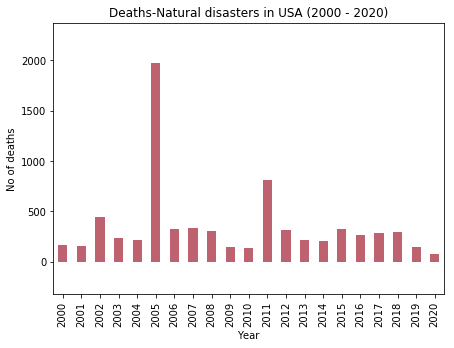

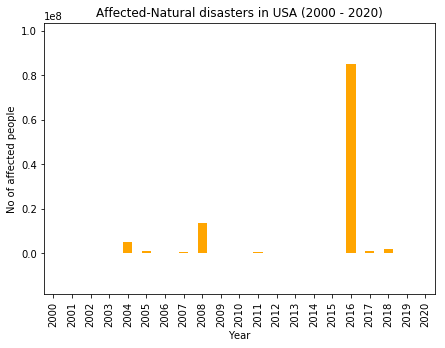

In [40]:
plot_deaths()
plot_affected()

In [41]:
df_sector_jumps_totals_sliced= df_year_all_joined[['Total Stock Market', 'Communications', 'Materials',
       'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials',
       'Health Care', 'Industrial', 'Technology', 'Real Estate', 'Utilities',
       'BioTech', 'Defense', 'Semiconductor', 'Home Construction']]

In [42]:
df_sector_jumps_totals_sliced.reset_index(inplace=True)

In [43]:
#df_sector_jumps_totals
cols=range(len(df_sector_jumps_totals_sliced.columns))
rows=range(len(df_sector_jumps_totals_sliced.index))
data_list=[]
count=0
for i in rows:
    row=int(i)
    year= int(df_sector_jumps_totals_sliced.loc[row][0])
    sectors=[]
    jumps=[]
    for j in cols:
        col=int(j)
        sector=df_sector_jumps_totals_sliced.columns[col]
        jumpcount=int(df_sector_jumps_totals_sliced.loc[row][col])
        if col !=0:
            # prepare list of values to be entered as columns to df
            sectors.append(sector)
            jumps.append(jumpcount)
            data_list.append([year,sector,jumpcount])

In [44]:
df_sector_jumps_totals = pd.DataFrame(data_list)

In [45]:
df_sector_jumps_totals.columns = ["year", 'sector', 'jumpcount']

In [46]:
df_sector_jumps_totals.head(7)

,year,sector,jumpcount
0,2000,Total Stock Market,0
1,2000,Communications,0
2,2000,Materials,0
3,2000,Consumer Discretionary,20
4,2000,Consumer Staples,0
5,2000,Energy,24
6,2000,Financials,0


In [47]:
fig =px.scatter(df_sector_jumps_totals, x='year', y= 'jumpcount', size= 'jumpcount', color= 'sector', hover_name='sector', log_x=True, size_max=60)

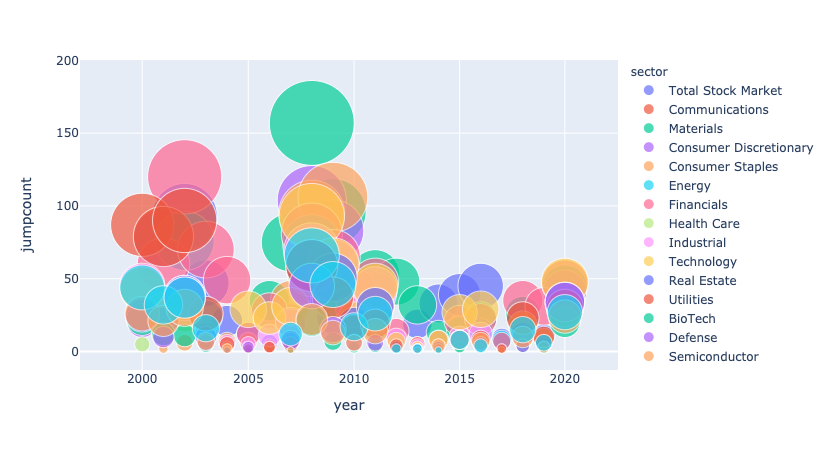

In [48]:
fig.show()

In [49]:
def plot_sector_jumps_totals_by_sector(sector):
    df_sector_jumps_totals_sector= df_sector_jumps_totals[df_sector_jumps_totals.sector==sector]
    fig = px.scatter(df_sector_jumps_totals_sector, x="year", y="jumpcount", size="jumpcount", color="sector",hover_name="sector", log_x=True, size_max=60)
    return fig

In [50]:
interact(plot_sector_jumps_totals_by_sector, sector=df_sector_jumps_totals["sector"])

Column
    [0] Column
        [0] Select(name='sector', options=['Total Stock Market', ...], value='Total Stock Market')
    [1] Row
        [0] Plotly(Figure, name='interactive01459')